



<h1 style="font-size: 40px; color: #5A5A5A;text-align: center;
"> CAR SALES PREDICTION</h1>



 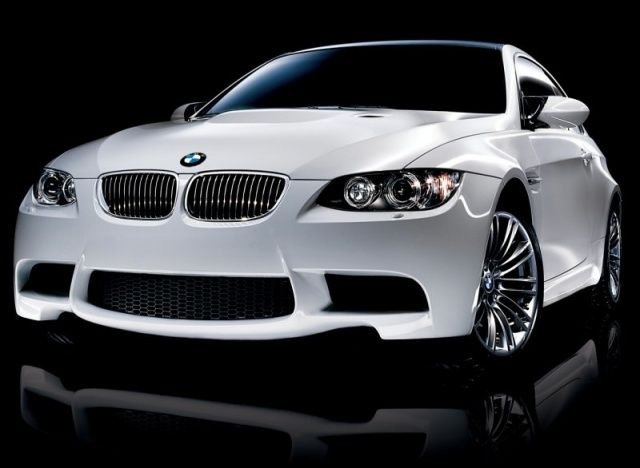

<h1 align='center' style="color:#808080"> Import the Dependencies
</h1>


In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score,mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("cardata (1).csv")
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [4]:
df.shape

(301, 9)

In [5]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [6]:
df.isnull().mean()*100

Car_Name         0.0
Year             0.0
Selling_Price    0.0
Present_Price    0.0
Kms_Driven       0.0
Fuel_Type        0.0
Seller_Type      0.0
Transmission     0.0
Owner            0.0
dtype: float64


 
<h1 style="font-size: 30px; color:11040D;text-align: center;
">  EXPLORATARY DATA ANALYSIS</h1>




<h1 style="font-size: 30px; color:#5A5A5A;text-align: center;
"> UNIVARIATE ANALYSIS</h1>




<h1 align='center' > HISTOGRAM
</h1>

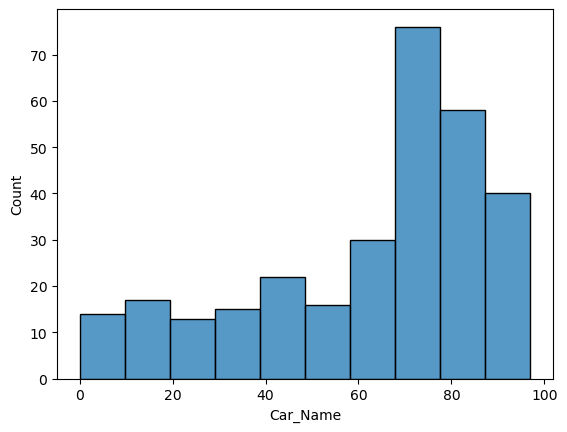

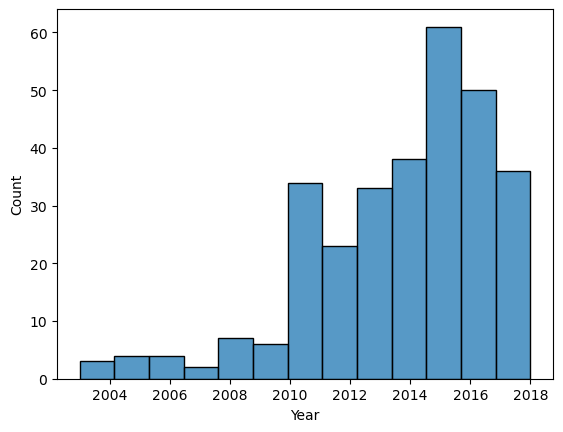

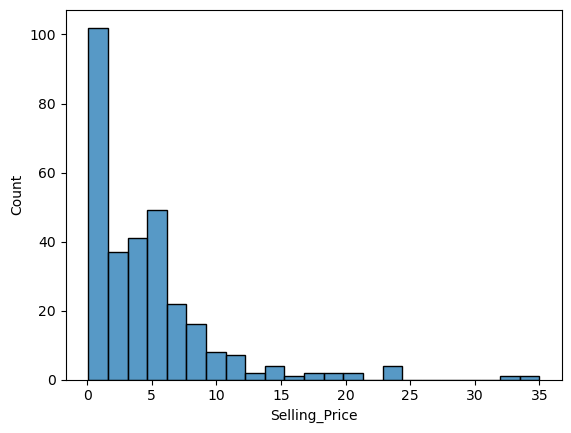

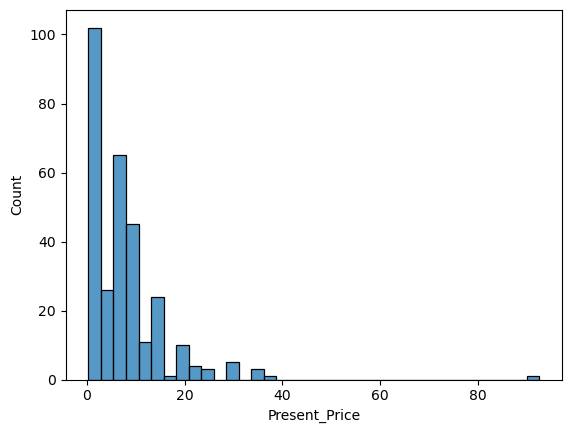

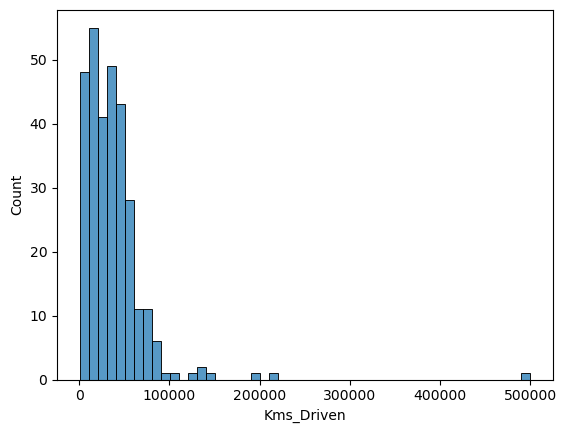

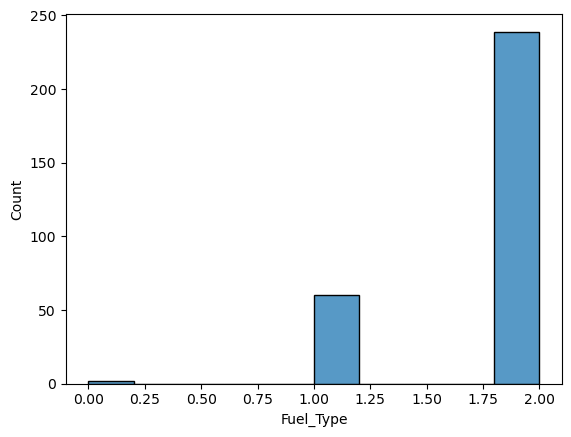

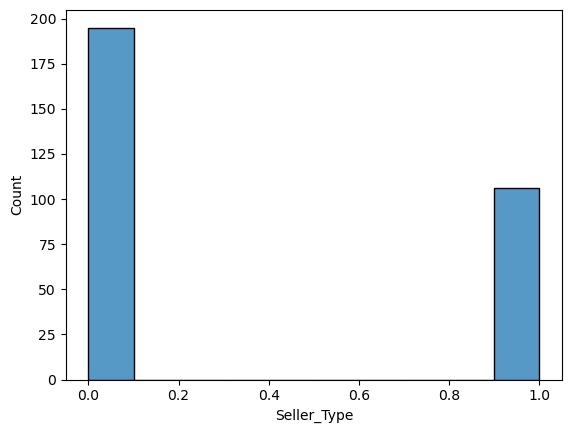

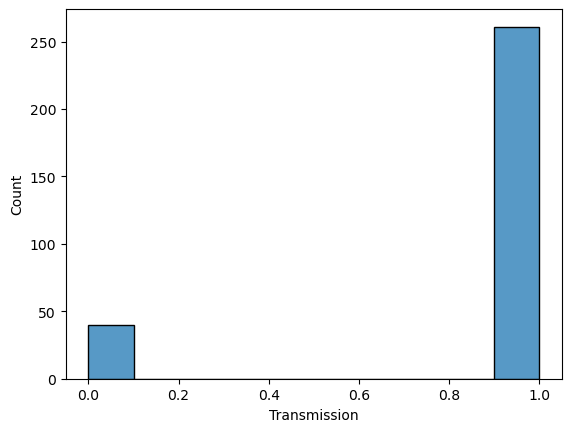

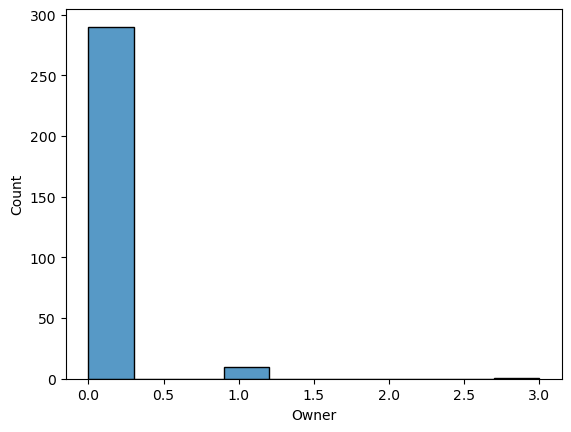

In [14]:
for i in df.columns:
    if df[i].dtypes !="object":
        sns.histplot(df[i])
        plt.show()





<h1 align='center' > KDE PLOT
</h1>

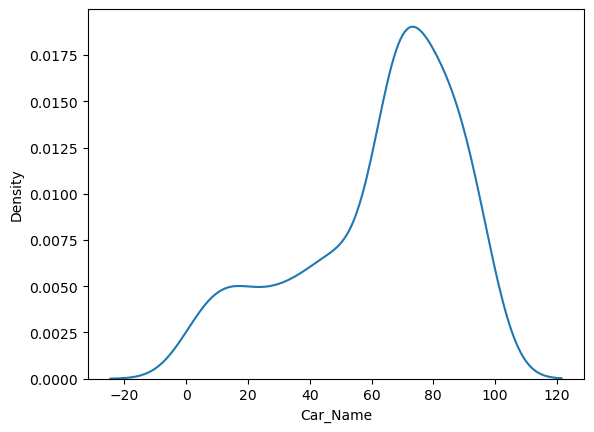

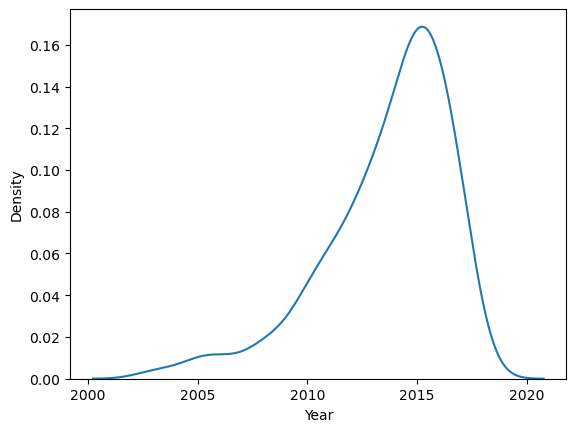

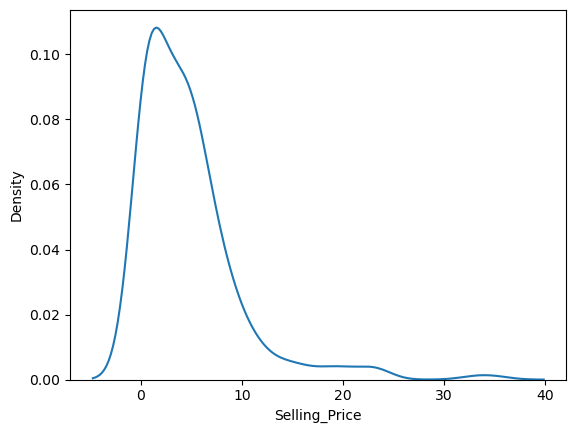

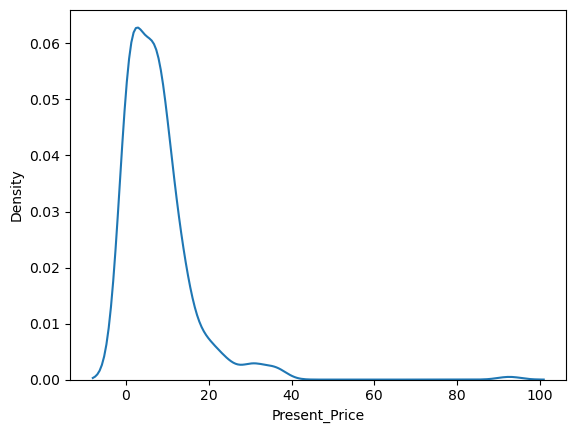

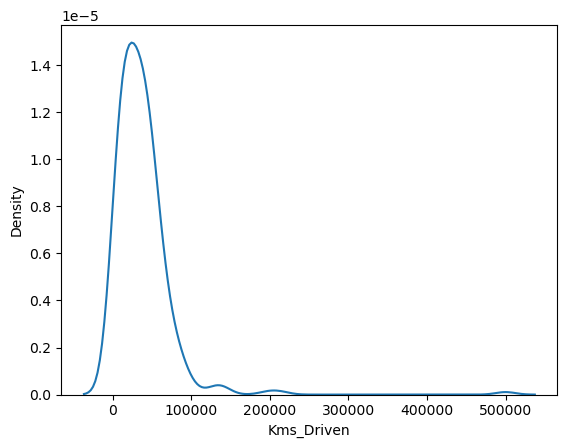

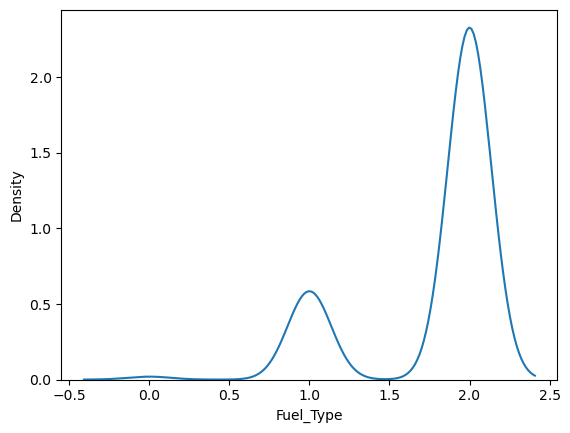

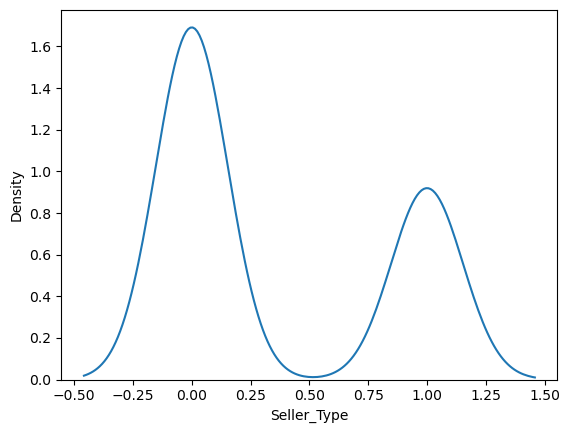

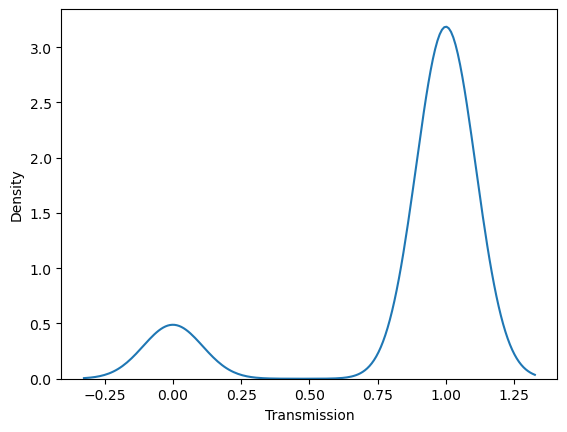

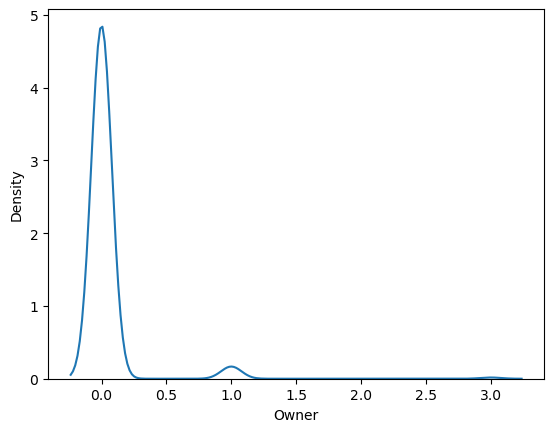

In [15]:
for i in df.columns:
    if df[i].dtypes !="object":
        sns.kdeplot(df[i])
        plt.show()







<h1 align='center' > BOXPLOT
</h1>

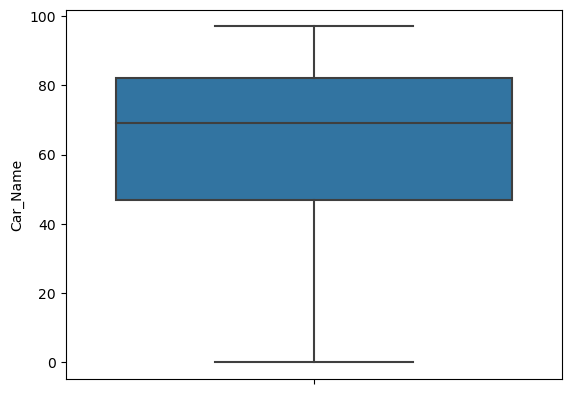

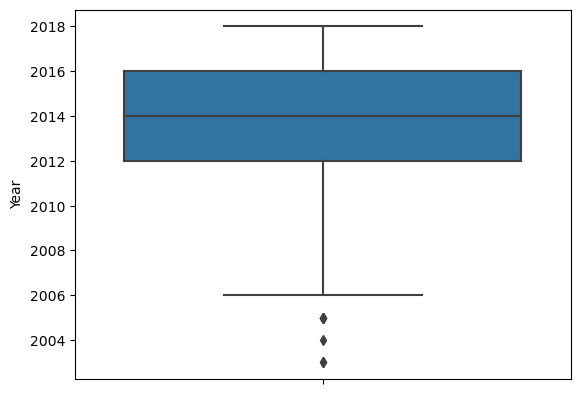

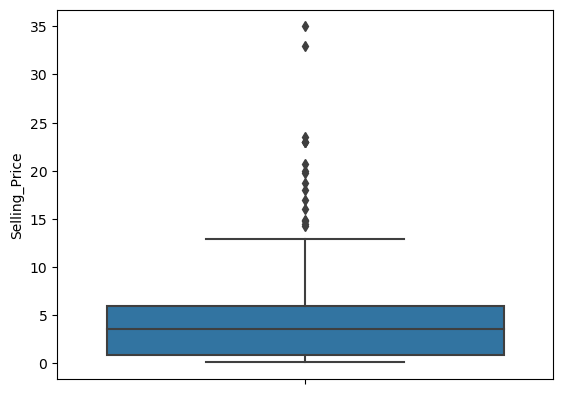

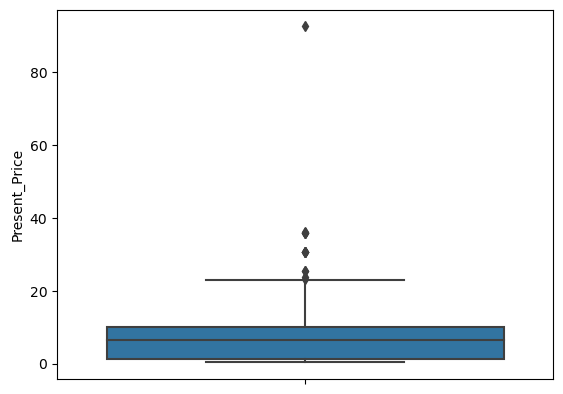

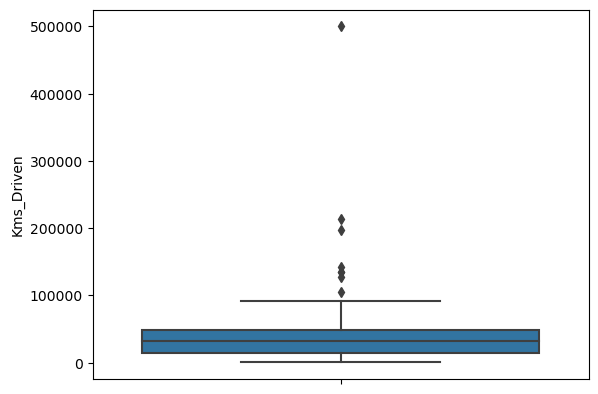

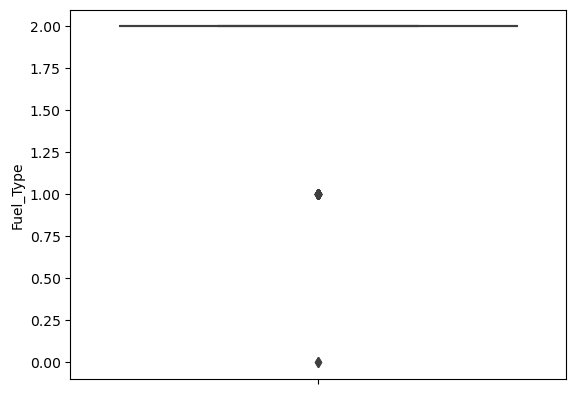

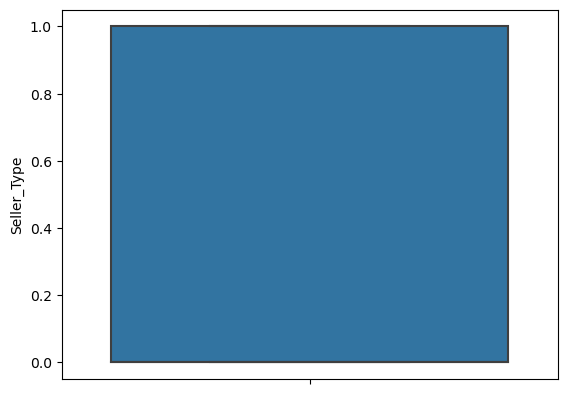

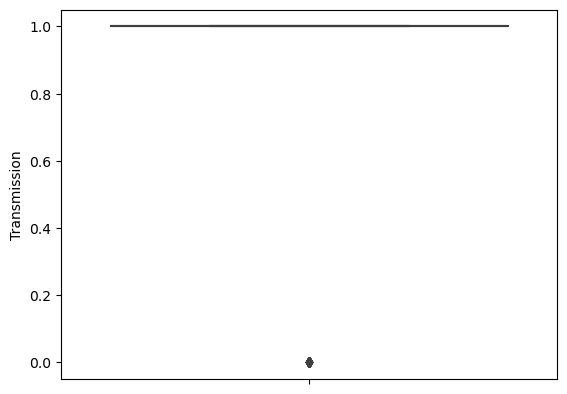

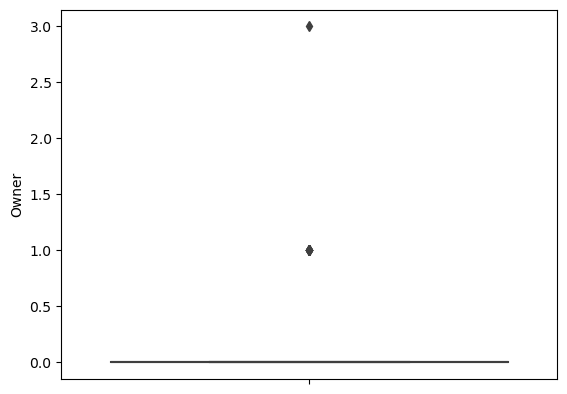

In [16]:
for i in df.columns:
    if df[i].dtype != "object":
        sns.boxplot(y=df[i])
    plt.show()

In [17]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,2014,3.35,5.59,27000,2,0,1,0
1,93,2013,4.75,9.54,43000,1,0,1,0
2,68,2017,7.25,9.85,6900,2,0,1,0
3,96,2011,2.85,4.15,5200,2,0,1,0
4,92,2014,4.60,6.87,42450,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,69,2016,9.50,11.60,33988,1,0,1,0
297,66,2015,4.00,5.90,60000,2,0,1,0
298,69,2009,3.35,11.00,87934,2,0,1,0
299,69,2017,11.50,12.50,9000,1,0,1,0





<h1 style="font-size: 30px; color: #5A5A5A;text-align: center;
"> MULTIVARIATE ANALYSIS</h1>

<h1 align='center' > BARPLOT
</h1>

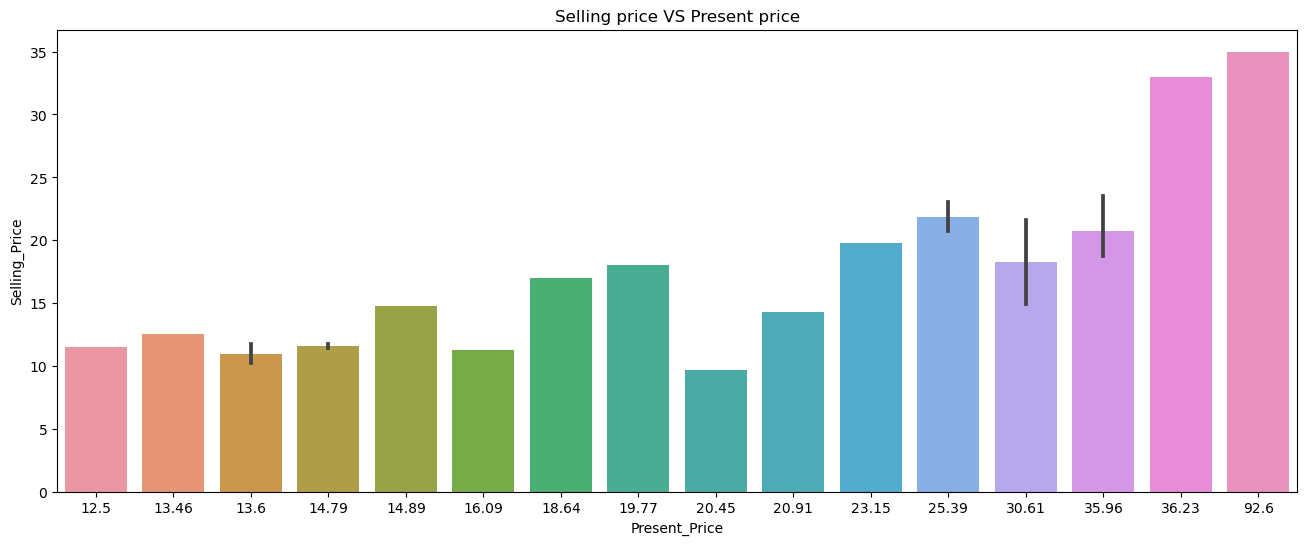

In [18]:

plt.figure(figsize=(16,6))
plt.title("Selling price VS Present price")
sns.barplot(x='Present_Price', y='Selling_Price', data=df.sort_values(by='Selling_Price', ascending=False)[:30]);

<h1 align='center' > PIECHARTS
</h1>

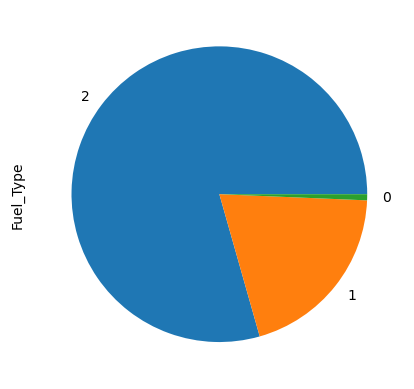

In [19]:
df.Fuel_Type.value_counts().plot.pie();

#Here we slicing fuel types using pie chart

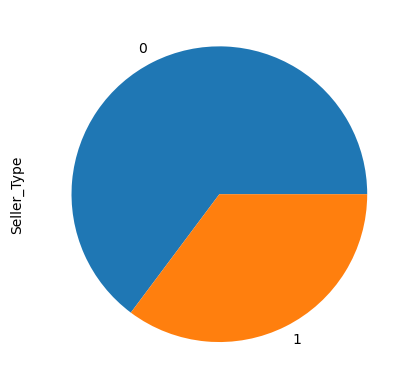

In [20]:
df.Seller_Type.value_counts().plot.pie();

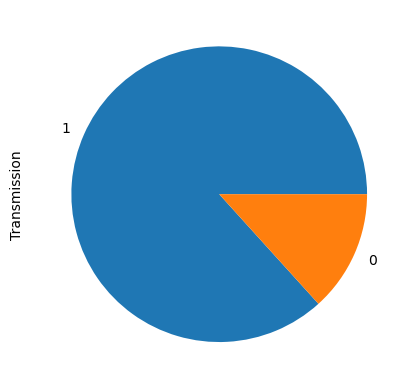

In [21]:
df.Transmission.value_counts().plot.pie();

<h1 align='center' > LINECHART

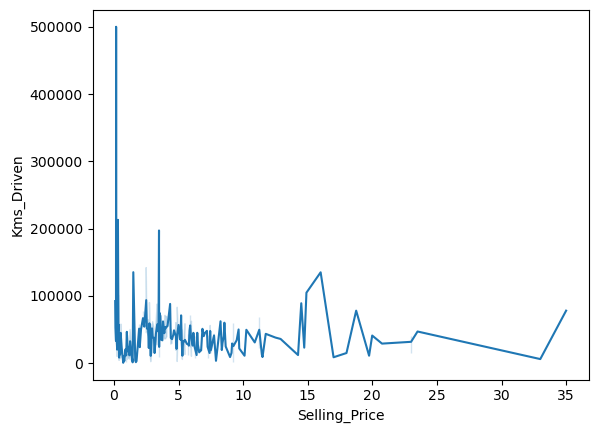

In [22]:
sns.lineplot(x='Selling_Price',y='Kms_Driven', data=df);

<h1 align='center' > BARPLOT

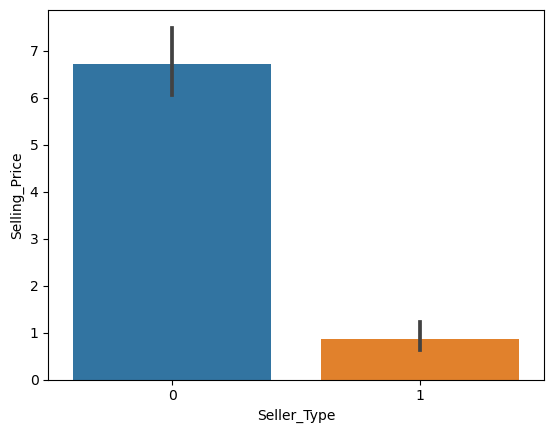

In [23]:
sns.barplot(x= 'Seller_Type', y='Selling_Price', data=df);

<h1 align='center' > SET THE OULIER

In [24]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL
    

In [25]:
for i in df.columns:
    if df[i].dtype != 'object':
        UL,LL= outlier_limit(df[i])        
        df[i]=np.where((df[i]>UL)|(df[i]<LL),np.nan,df[i])
  

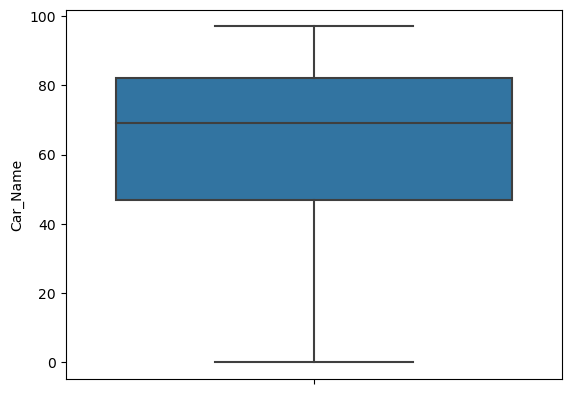

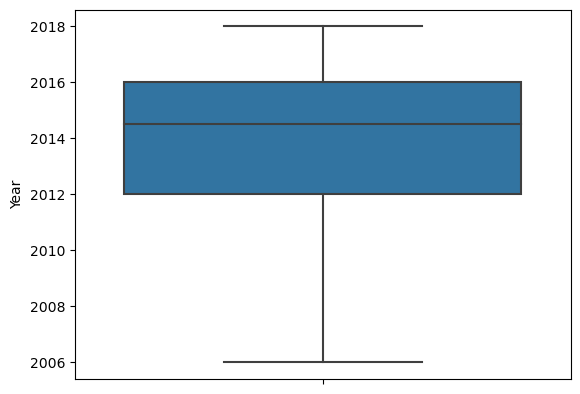

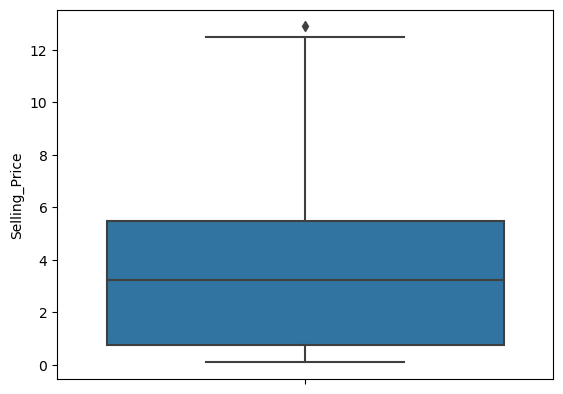

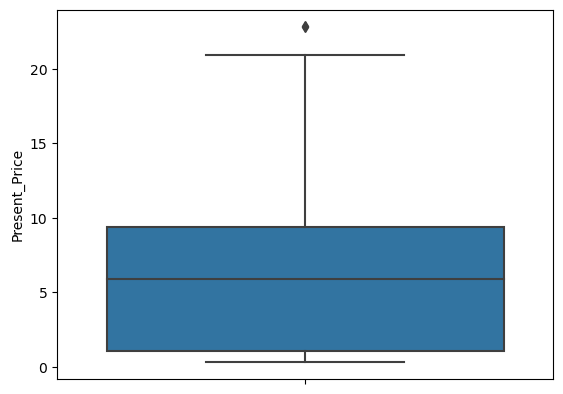

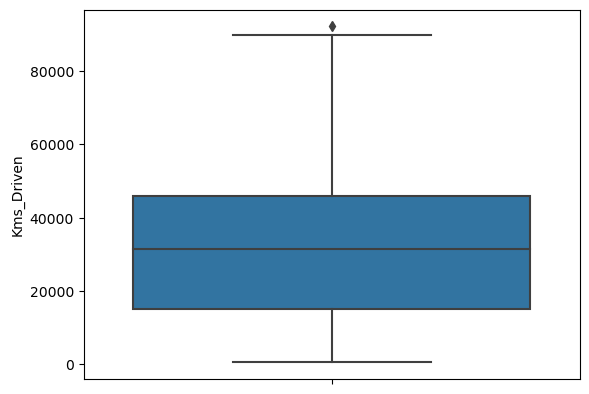

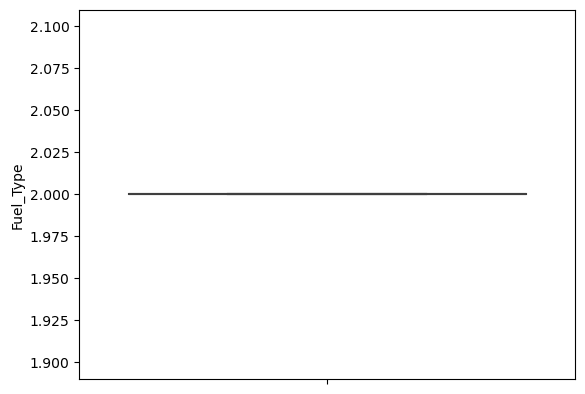

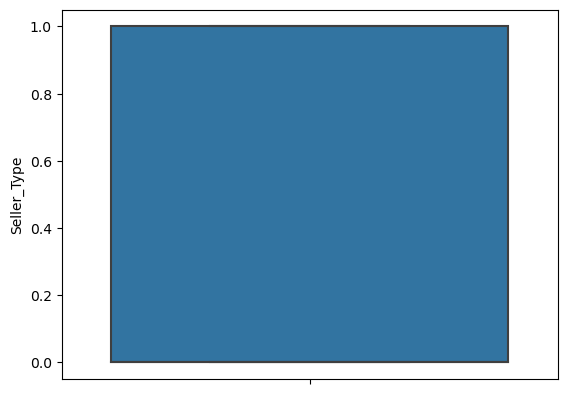

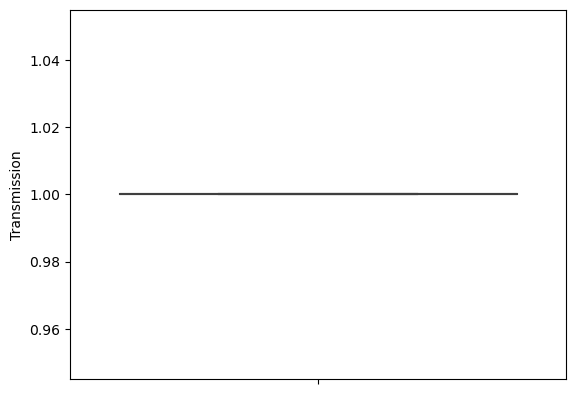

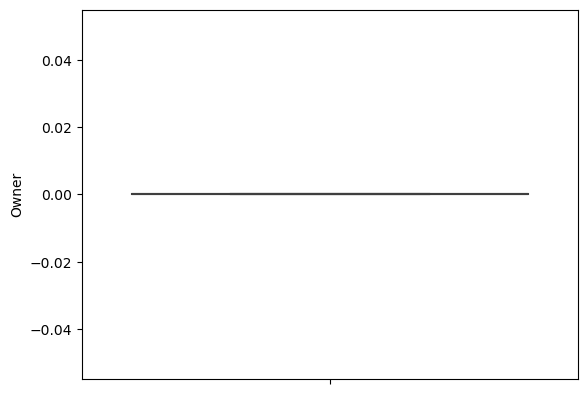

In [26]:
for i in df.columns:
    if df[i].dtype != 'object':
        sns.boxplot(y=df[i])
        plt.show();

In [27]:
df.isnull().mean()*100

Car_Name          0.000000
Year              2.325581
Selling_Price     5.647841
Present_Price     4.651163
Kms_Driven        2.657807
Fuel_Type        20.598007
Seller_Type       0.000000
Transmission     13.289037
Owner             3.654485
dtype: float64

In [28]:
df.dropna(inplace=True )



<h2 align='center' > Using Label encoder covert object data type  into numerical values
</h2>

In [29]:
le = LabelEncoder()

In [30]:
df['Car_Name']=le.fit_transform(df['Car_Name'])
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])
df['Seller_Type']=le.fit_transform(df['Seller_Type'])
df['Transmission']=le.fit_transform(df['Transmission'])



In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       194 non-null    int64  
 1   Year           194 non-null    float64
 2   Selling_Price  194 non-null    float64
 3   Present_Price  194 non-null    float64
 4   Kms_Driven     194 non-null    float64
 5   Fuel_Type      194 non-null    int64  
 6   Seller_Type    194 non-null    int64  
 7   Transmission   194 non-null    int64  
 8   Owner          194 non-null    float64
dtypes: float64(5), int64(4)
memory usage: 15.2 KB


In [32]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,69,2014.0,3.35,5.59,27000.0,0,0,0,0.0
2,53,2017.0,7.25,9.85,6900.0,0,0,0,0.0
3,73,2011.0,2.85,4.15,5200.0,0,0,0,0.0
6,53,2015.0,6.75,8.12,18796.0,0,0,0,0.0
10,49,2017.0,2.85,3.60,2135.0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
293,54,2010.0,3.25,9.90,38000.0,0,0,0,0.0
294,51,2014.0,3.75,6.80,33019.0,0,0,0,0.0
297,52,2015.0,4.00,5.90,60000.0,0,0,0,0.0
298,54,2009.0,3.35,11.00,87934.0,0,0,0,0.0


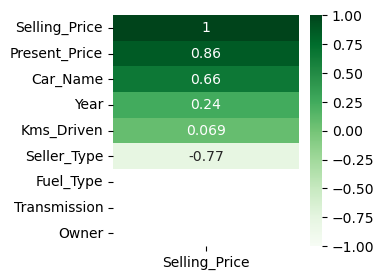

In [33]:
plt.figure(figsize=(3,3))
sns.heatmap(df.corr()[['Selling_Price']].sort_values(by="Selling_Price",ascending = False),vmin=-1,vmax=1,annot = True, cmap="Greens")
plt.show()

In [34]:
x=df[["Present_Price","Year","Kms_Driven"]].values

In [35]:
y=df[["Selling_Price"]].values




<h1 style="font-size: 30px; color: #5A5A5A;text-align: center;
"> Model Buliding Using Cross Validation</h1

In [36]:
models = {
    "LinearRegression": LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(), 
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}

In [31]:
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  1.728024222541063
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  1.7279728168673862
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  5.2174357610669855
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  1.0428716856742144
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  0.9185793477190657
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  1.0271473394581958
*******************************************




<h1 style="font-size: 30px; color: #5A5A5A;text-align: center;
">  RadomForestRegressor has lowest RMSE value</h1


<h2 align='center' > Feature scaling
</h2>

In [32]:
sc=StandardScaler()

In [33]:
x=sc.fit_transform(x)




<h2 align='center' > Spliting into training and testing
</h2>

In [34]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [35]:
RF= RandomForestRegressor()

In [36]:
RF.fit(x_train, y_train)

RandomForestRegressor()

In [37]:
training_score = RF.score(x_train, y_train)
training_score

0.9812262300377742

In [38]:
testing_score=RF.score(x_test,y_test)
testing_score

0.9252627683937904

In [39]:
y_pred = RF.predict(x)

In [40]:
output = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)
output

,ACTUAL,PREDICTED
0,3.35,3.810220
1,4.75,5.212000
2,7.25,7.805800
3,2.85,2.706500
4,4.60,4.483110
...,...,...
296,9.50,8.545400
297,4.00,4.142161
298,3.35,3.548000
299,11.50,10.432210





<h1 style="font-size: 30px; color: #5A5A5A;text-align: center;
">SCATTER PLOT</h1
    

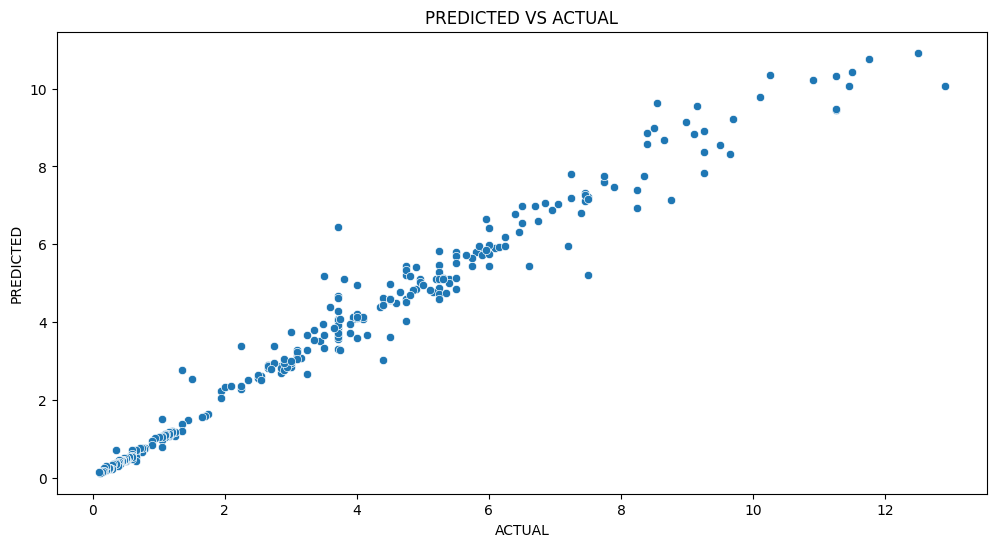

In [41]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED VS ACTUAL")
sns.scatterplot(data=output, x="ACTUAL", y = "PREDICTED");